In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling (if working with time-series)
from datetime import datetime

# Optional: warnings filter for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load your sales dataset
try:
    df = pd.read_csv('Dataset.csv.csv')
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please check the filename or path.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

✅ Dataset loaded successfully.


In [7]:
# Preview the first few rows
print(df.head())

# Check column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [8]:
# Fill missing values (forward fill as a safe default)
df.fillna(method='ffill', inplace=True)

# Optional: drop rows with missing values
# df.dropna(inplace=True)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None


In [10]:
print(df.describe())

           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   

         Total Cost  Total Profit  
count  1.000000e+02  1.000000e+02  
mean   9.318057e+05  4.416820e+05  
std    1.083938e+06  4.385379e+05  
min    3.612240e+03  1.258020e+03  
25%    1.688680e+05  1.214436e+05  
50%    3.635664e+05  2.907680e+05  
75%    1.613870e+06  6.358288e+05  
max    4.509794e+06  1.719922e+06  


In [11]:
# Group by Region and calculate average Total Revenue
regional_sales = df.groupby('Region')['Total Revenue'].mean()
print(regional_sales)

Region
Asia                                 1.940645e+06
Australia and Oceania                1.281297e+06
Central America and the Caribbean    1.310055e+06
Europe                               1.516770e+06
Middle East and North Africa         1.405271e+06
North America                        1.881119e+06
Sub-Saharan Africa                   1.102001e+06
Name: Total Revenue, dtype: float64


In [12]:
# Group by Item Type and calculate average Units Sold
product_performance = df.groupby('Item Type')['Units Sold'].mean()
print(product_performance)

Item Type
Baby Food          5792.142857
Beverages          7088.500000
Cereal             3696.714286
Clothes            5481.538462
Cosmetics          6439.846154
Fruits             4999.800000
Household          4969.666667
Meat               5337.500000
Office Supplies    3913.916667
Personal Care      4870.800000
Snacks             4545.666667
Vegetables         3341.833333
Name: Units Sold, dtype: float64


In [13]:
top_region = regional_sales.idxmax()
top_product = product_performance.idxmax()

print(f"🌍 Highest average revenue comes from: {top_region}")
print(f"📦 Most units sold on average: {top_product}")

🌍 Highest average revenue comes from: Asia
📦 Most units sold on average: Beverages


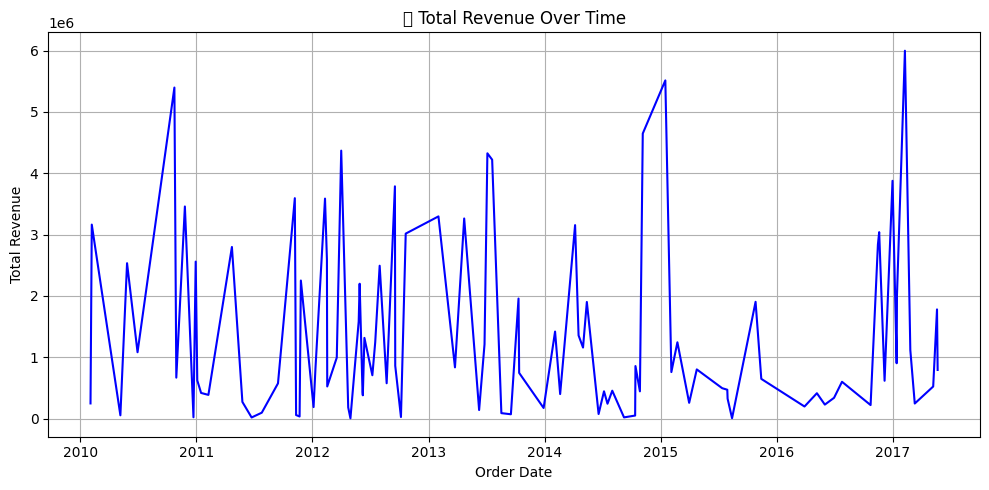

In [14]:
# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort by date
df.sort_values('Order Date', inplace=True)

# Plot total revenue over time
plt.figure(figsize=(10, 5))
plt.plot(df['Order Date'], df['Total Revenue'], color='blue')
plt.title('📅 Total Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

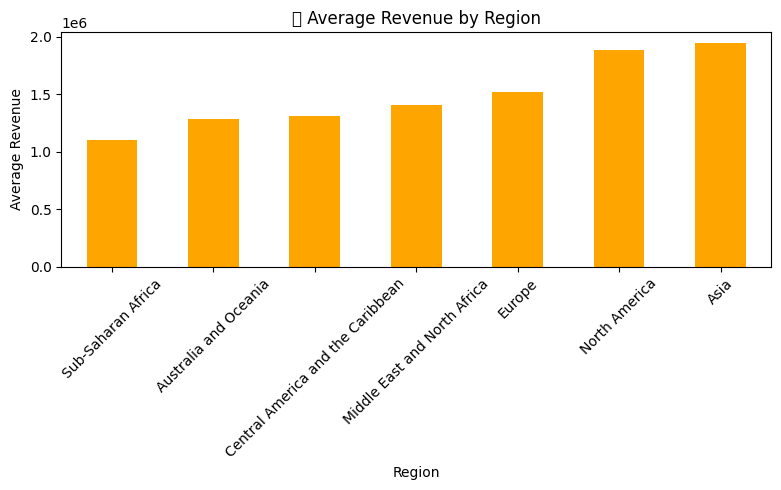

In [15]:
# Group by Region
region_avg = df.groupby('Region')['Total Revenue'].mean().sort_values()

# Plot
region_avg.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('🌍 Average Revenue by Region')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

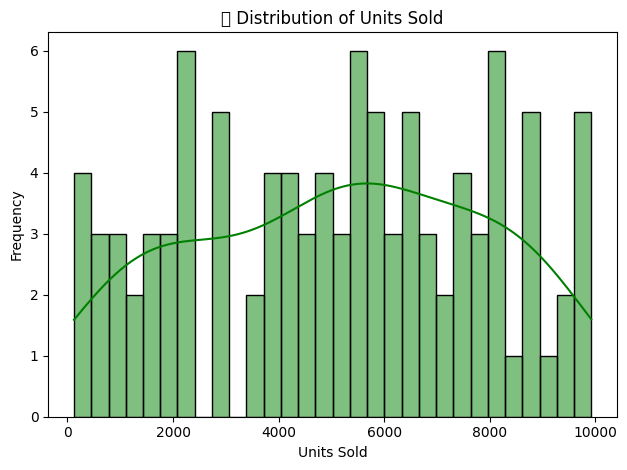

In [16]:
sns.histplot(df['Units Sold'], bins=30, kde=True, color='green')
plt.title('📦 Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

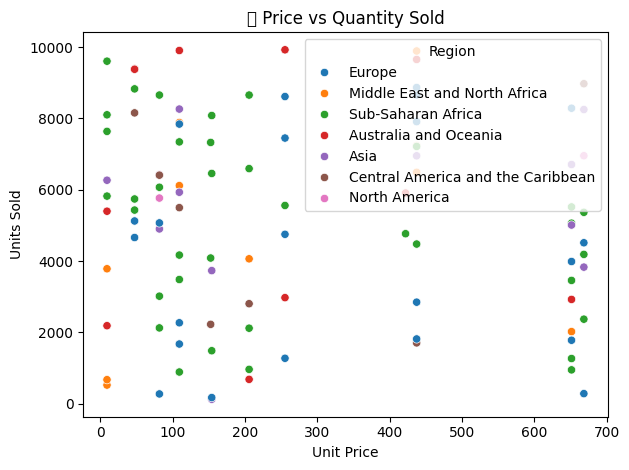

In [17]:
sns.scatterplot(data=df, x='Unit Price', y='Units Sold', hue='Region')
plt.title('💰 Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.legend(title='Region')
plt.tight_layout()
plt.show()